In [18]:
# Import packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [19]:
# Read Data and convert to local CRS

gdf = gpd.read_file("C:/Users/alkaye/geodemographics-demonstrator/processed_data/h3_preprocessed.geojson").to_crs('2180')

In [20]:
# Drop unique cols

#gdf1 = gdf.drop(columns=['id', 'name', 'geometry', 'Type'])
gdf1 = gdf.drop(columns=['h3_index', 'geometry', 'Type'])
gdf1

,total,total_male,total_female,0-4_total,0-4_males,0-4_females,5-9_total,5-9_males,5-9_females,10-14_total,...,85+_females,population_density,dentist,hospital,nursing_home,pharmacy,place_of_worship,school,university,pollen_level
0,1746.0,853.0,892.0,85.0,45.0,41.0,100.0,48.0,53.0,106.0,...,25.0,0.007038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2016.0,1000.0,1016.0,115.0,59.0,55.0,127.0,67.0,60.0,122.0,...,32.0,0.008123,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1
2,4687.0,2290.0,2397.0,229.0,120.0,109.0,269.0,127.0,141.0,284.0,...,67.0,0.018946,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,43019.0,20516.0,22502.0,1829.0,960.0,869.0,2318.0,1195.0,1122.0,2328.0,...,821.0,0.173812,5.0,0.0,0.0,23.0,5.0,4.0,0.0,1
4,437.0,212.0,225.0,19.0,9.0,10.0,21.0,11.0,10.0,25.0,...,6.0,0.001795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,751.0,386.0,364.0,27.0,14.0,14.0,36.0,19.0,17.0,38.0,...,12.0,0.003408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1445,286.0,147.0,138.0,11.0,5.0,5.0,15.0,8.0,7.0,15.0,...,4.0,0.001297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1446,4492.0,2247.0,2245.0,176.0,90.0,87.0,230.0,130.0,101.0,240.0,...,84.0,0.020304,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1
1447,3164.0,1593.0,1572.0,122.0,66.0,56.0,159.0,80.0,79.0,174.0,...,57.0,0.014296,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [21]:
# Scale data

scaler = StandardScaler()
df_scaled = scaler.fit_transform(gdf1)

# stats of scaled data
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
count,1.449000e+03,1.449000e+03,1.449000e+03,1.449000e+03,1.449000e+03,1.449000e+03,1.449000e+03,1.449000e+03,1449.000000,1.449000e+03,...,1.449000e+03,1.449000e+03,1.449000e+03,1449.000000,1.449000e+03,1.449000e+03,1.449000e+03,1449.000000,1.449000e+03,1.449000e+03
mean,3.922941e-17,-2.942206e-17,-2.942206e-17,3.922941e-17,9.807353e-18,-4.903677e-17,9.807353e-18,-2.942206e-17,0.000000,3.922941e-17,...,1.961471e-17,-2.942206e-17,-7.355515e-18,0.000000,3.922941e-17,-9.807353e-18,2.942206e-17,0.000000,-4.903677e-18,2.451838e-16
std,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345,1.000345e+00,...,1.000345e+00,1.000345e+00,1.000345e+00,1.000345,1.000345e+00,1.000345e+00,1.000345e+00,1.000345,1.000345e+00,1.000345e+00
min,-5.333626e-01,-5.487616e-01,-5.196447e-01,-5.081980e-01,-5.082383e-01,-5.080707e-01,-5.482470e-01,-5.485991e-01,-0.547779,-5.778648e-01,...,-4.643195e-01,-5.355993e-01,-1.815380e-01,-0.192970,-1.612798e-01,-4.185420e-01,-4.674939e-01,-0.266201,-8.461283e-02,-3.955055e-01
25%,-3.715413e-01,-3.757294e-01,-3.669709e-01,-3.624526e-01,-3.603994e-01,-3.626901e-01,-3.828392e-01,-3.816274e-01,-0.383210,-3.982352e-01,...,-3.306658e-01,-3.694713e-01,-1.815380e-01,-0.192970,-1.612798e-01,-3.699702e-01,-4.674939e-01,-0.266201,-8.461283e-02,-3.955055e-01
50%,-2.595049e-01,-2.611328e-01,-2.592399e-01,-2.564149e-01,-2.565602e-01,-2.571271e-01,-2.678947e-01,-2.653714e-01,-0.267190,-2.708614e-01,...,-2.347093e-01,-2.592188e-01,-1.815380e-01,-0.192970,-1.612798e-01,-2.242548e-01,-1.792392e-01,-0.172647,-8.461283e-02,-3.955055e-01
75%,-1.528395e-02,-8.407764e-03,-1.927414e-02,-1.952222e-02,-1.984205e-02,-1.636940e-02,-1.677913e-02,-1.647445e-02,-0.015400,-7.540637e-03,...,-5.764674e-02,-1.694864e-02,-1.025207e-01,-0.192970,-1.612798e-01,-2.996769e-02,1.090156e-01,0.014463,-8.461283e-02,-3.955055e-01
max,1.525669e+01,1.504531e+01,1.544007e+01,1.674120e+01,1.675195e+01,1.672926e+01,1.616235e+01,1.615403e+01,16.169071,1.551614e+01,...,1.644687e+01,1.543082e+01,2.312856e+01,18.996206,1.541835e+01,1.731016e+01,1.653954e+01,20.877140,2.881490e+01,2.528410e+00


In [22]:
# # define the kmeans function with intialisation as kmeans++
# kmeans = KMeans(n_clusters=2, init='k-means++')

# # fit on scaled data
# kmeans.fit(df_scaled)

# # inertia in the fitted data
# # high number means worse fit
# kmeans.inertia_

In [23]:
# # Use elbow method to determine a good number of clusters

# # fitting multiple k-means algorithms and storing the values in an empty list
# SSE = []
# for cluster in range(1,20):
#     kmeans = KMeans(n_clusters=cluster, init='k-means++')
#     kmeans.fit(df_scaled)
#     SSE.append(kmeans.inertia_)

# # converting the results into a dataframe and plotting them
# frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
# plt.plot(frame['Cluster'], frame['SSE'], marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')

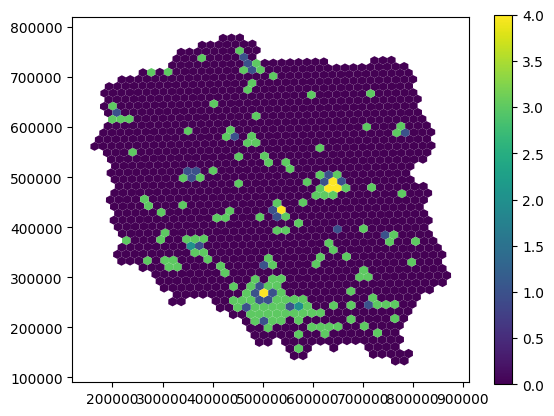

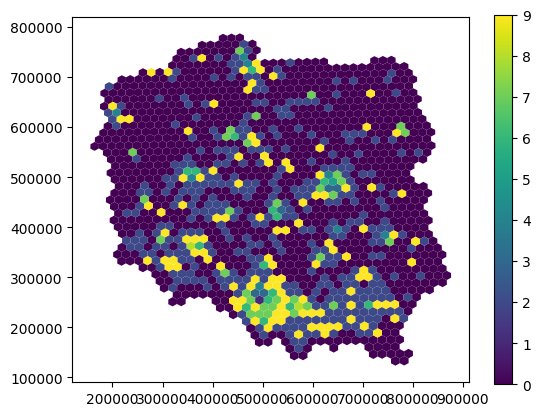

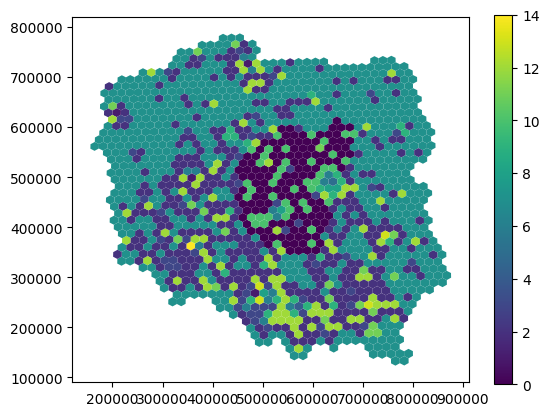

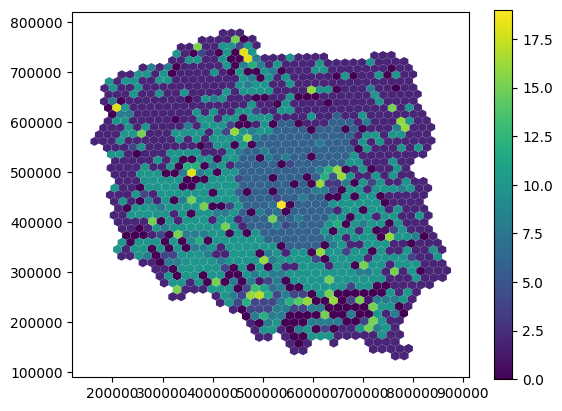

In [24]:
# Set number of cluseter to 5, 10 and 15 and fit the model

k_list = [5, 10, 15, 20]

# Add in Point Geom
gdf_pred = gdf.copy()
# gdf_pred['geometry'] = gdf_pred.centroid
# gdf_pred = gdf_pred.set_geometry('geometry')

for k in k_list:

    # k means using 5 clusters and k-means++ initialization
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df_scaled)
    pred = kmeans.predict(df_scaled)

    # Combine with orignal gdf
    gdf_pred[f'{k}_clusters'] = pred

    # PLot
    gdf_pred.plot(column=f'{k}_clusters', legend=True)

# # Convert to WGS and save
gdf_pred = gdf_pred.to_crs('4236')
# gdf_pred
# gdf_pred['lon'] = gdf_pred.geometry.x
# gdf_pred['lat'] = gdf_pred.geometry.y
gdf_pred.to_file('C:/Users/alkaye/geodemographics-demonstrator/processed_data/h3_clustered.geojson')
gdf_pred.to_csv('C:/Users/alkaye/geodemographics-demonstrator/processed_data/h3_clustered.csv')

    

In [25]:
# predictions = pd.DataFrame(df_scaled)
# predictions['cluster'] = pred
# predictions['cluster'].value_counts()